Assignment 6: Knock airport Weather
Create a notebook called assignment_6_Weather.ipynb

Get the data from this link.

https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv

(This is different that the data I used in the lecture)

Plot:

The temperature

The mean temperature each day

The mean temperature for each month 

60% of the marks will be given for the above

For the last 40%

Plot:

The Windspeed (there is data missing from this column) 

The rolling windspeed (say over 24 hours) 

The max windspeed for each day 

The monthly mean of the daily max windspeeds (yer I am being nasty here) 

You do not need to over comment your code. Marks will be given for how nice the plots are.

In [64]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Load the data.
# add skiprows to skip the metadata at the top of the file.
url = "https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv"
df = pd.read_csv(url, skiprows=23)

# Inspect the data.
df.head(5)


C:\Users\laura\AppData\Local\Temp\ipykernel_9992\1062867092.py:10: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, skiprows=23)


,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7
3,31-jul-1996 10:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,0,0,0,25,82,0.0,28000,35,6
4,31-jul-1996 11:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,0,0,0,2,11,0.0,40000,40,6


When looking at the excel file of the downloaded data set. The meta data at the top is a key for each column and what data it represents. For this assignment, we are looking at the column "temp" for Air Temperature.



date:  -  Date and Time (utc)

rain:  -  Precipitation Amount (mm)	

temp: -  Air Temperature (C)	

wetb:  -  Wet Bulb Temperature (C)		

dewpt: -  Dew Point Temperature (C)       

rhum:  -  Relative Humidity (%)			

vappr: -  Vapour Pressure (hPa)	 	

msl:   -  Mean Sea Level Pressure (hPa)	

wdsp:  -  Mean Wind Speed (knot)			

wddir: -  Predominant Wind Direction (degree)		

ww:    -  Synop code for Present Weather	

w:     -  Synop code for Past Weather	

sun:   -  Sunshine duration (hours)		

vis:   -  Visibility (m)		

clht:  -  Cloud height (100's of ft) - 999 if none 	

clamt: -  Cloud amount	

ind:   -  Indicator			


References - add context - maybe look at reworking with all the years


[Pandas Documentation: Usecols](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html#:~:text=usecolsSequence%20of%20Hashable%20or%20Callable%2C%20optional)

I only looked at year 2023 for this assignment as too much data was clustering the plots. Felt a year was a good amount of time for a  sample size 

I used [ChatGBT](https://chatgpt.com/s/t_6918ad2bef388191bbcc7e2785bb8d07) to assist with the code for filtering the data by year.

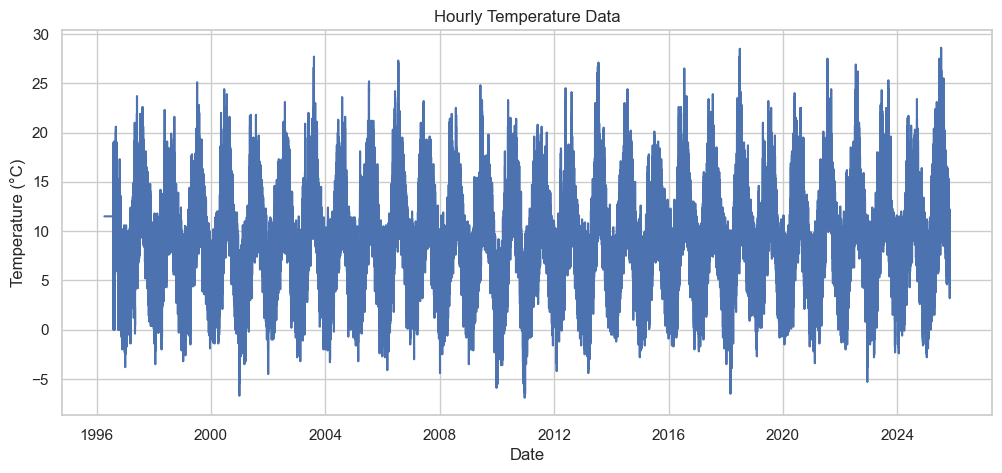

In [65]:
# Plot the temperature data.
# Looking only at the 'date' and 'temp' columns for plotting.
columns = ['date','temp']

# Reload the data with only the necessary columns.
# usecols to limit the data read into memory
df = pd.read_csv(url, usecols=columns, skiprows=23)


# Convert 'date' column to datetime.
# The date format in the data is 'DD-MMM-YYYY HH:MM'
df['date'] = pd.to_datetime(df['date'], format='%d-%b-%Y %H:%M')

# Plot using seaborn and matplotlib. 

plt.figure(figsize=(12,5))
sns.lineplot(data=df, x='date', y='temp')
plt.title(f'Hourly Temperature Data')
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.show()

In [71]:
# Calculate the daily mean temperature.

daily_mean = (df.set_index('date').resample('D')['temp'].mean().reset_index())

# Take a look at the daily mean before plotting.
print(daily_mean)

            date       temp
0     1996-04-10  11.500000
1     1996-04-11        NaN
2     1996-04-12        NaN
3     1996-04-13        NaN
4     1996-04-14        NaN
...          ...        ...
10793 2025-10-28   8.604167
10794 2025-10-29   6.612500
10795 2025-10-30   7.887500
10796 2025-10-31   9.670833
10797 2025-11-01   7.400000

[10798 rows x 2 columns]


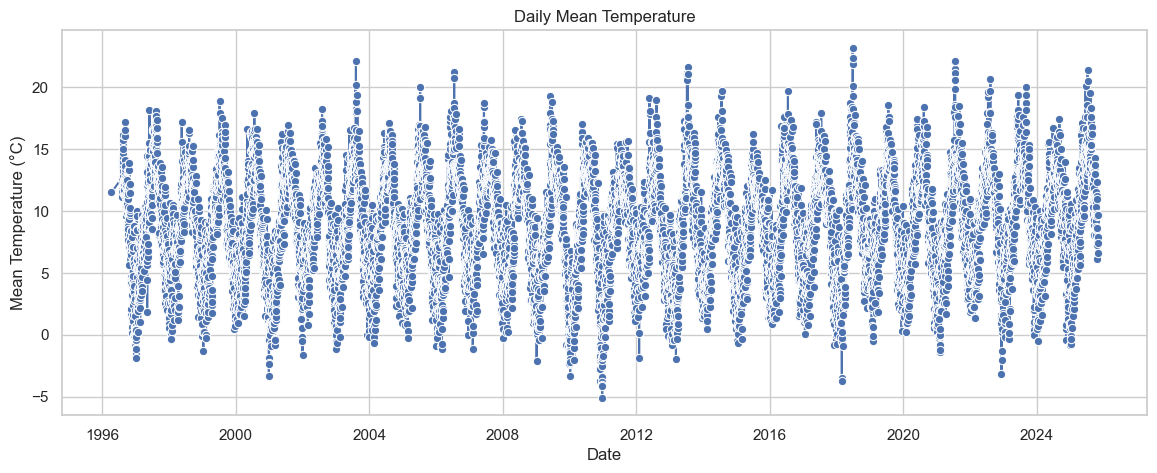

In [72]:
# Plot the daily mean.

plt.figure(figsize=(14,5))

# daily_mean is a DataFrame with 'date' and 'temp' columns
sns.lineplot(data=daily_mean, x='date', y='temp', marker='o')
plt.title('Daily Mean Temperature')
plt.xlabel("Date")
plt.ylabel("Mean Temperature (°C)")
plt.show()

In [73]:
# Compute monthly mean temperature.

monthly_mean = (df.set_index('date').resample('M')['temp'].mean().reset_index())

# Take a look at the monthly mean before plotting.
print(monthly_mean)

          date       temp
0   1996-04-30  11.500000
1   1996-05-31        NaN
2   1996-06-30        NaN
3   1996-07-31  12.650000
4   1996-08-31  12.946909
..         ...        ...
351 2025-07-31  15.068280
352 2025-08-31  15.178495
353 2025-09-30  11.368056
354 2025-10-31   9.900134
355 2025-11-30   7.400000

[356 rows x 2 columns]


C:\Users\laura\AppData\Local\Temp\ipykernel_9992\1242674784.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_mean = (df.set_index('date').resample('M')['temp'].mean().reset_index())


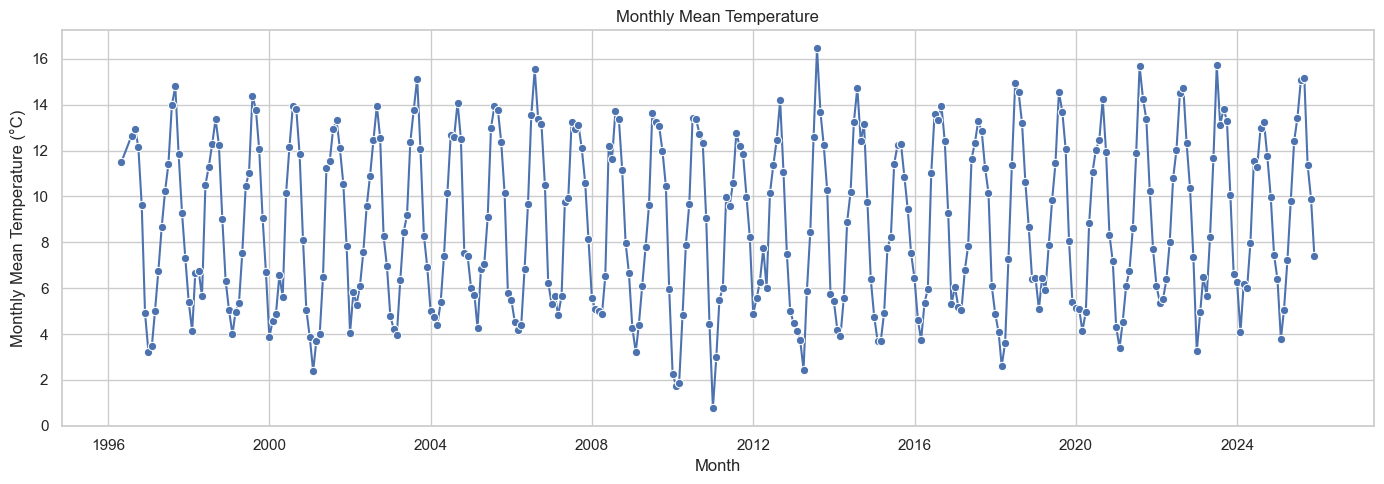

In [76]:
# Plot the monthly mean. 
plt.figure(figsize=(14,5))
sns.lineplot(x=monthly_mean['date'], y=monthly_mean['temp'], marker='o')
plt.title('Monthly Mean Temperature')
plt.xlabel("Month")
plt.ylabel("Monthly Mean Temperature (°C)")
plt.tight_layout()
plt.show()

## second draft where don't filter by year 

In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [78]:
sns.set(style="whitegrid")

In [79]:
# Load data (no year filtering; full range)
url = "https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv"
# skip the metadata at the top
df = pd.read_csv(url, skiprows=23)

# Quick inspect

C:\Users\laura\AppData\Local\Temp\ipykernel_9992\2711705624.py:4: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, skiprows=23)


In [ ]:
# Parse datetime and set index
# The file usually has a 'date' column like 'DD-MMM-YYYY HH:MM'. Use dayfirst and coerce errors to catch parsing issues.
df['date'] = pd.to_datetime(df['date'], dayfirst=True, errors='coerce')
# drop rows where date failed to parse
df = df.dropna(subset=['date']).copy()
# set index
df = df.set_index('date').sort_index()

print('\nDate range:', df.index.min(), 'to', df.index.max())


C:\Users\laura\AppData\Local\Temp\ipykernel_9992\1412144930.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'], dayfirst=True, errors='coerce')


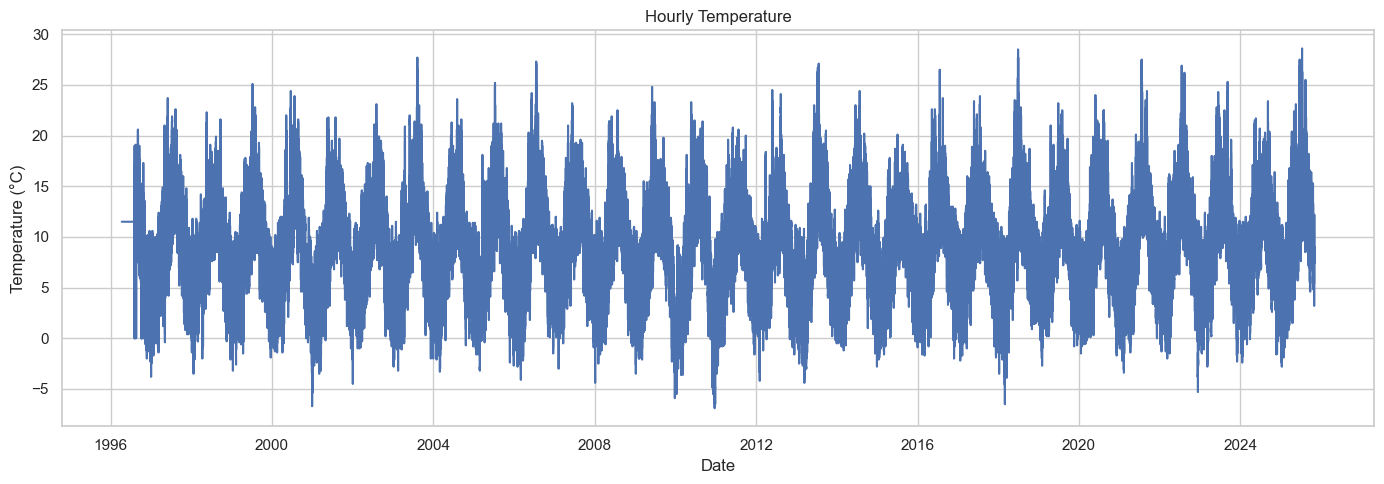

In [ ]:
# Cell 4 - Temperature: hourly time series 
if 'temp' not in df.columns:
    raise ValueError("No 'temp' column found in the data. Check column names printed above.")

plt.figure(figsize=(14,5))
ax = sns.lineplot(data=df, x=df.index, y='temp')
ax.set_title('Hourly Temperature')
ax.set_xlabel('Date')
ax.set_ylabel('Temperature (°C)')
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(mdates.AutoDateLocator()))
plt.tight_layout()
plt.show()



Daily mean sample:
date
1996-04-10    11.5
1996-04-11     NaN
1996-04-12     NaN
1996-04-13     NaN
1996-04-14     NaN
Freq: D, Name: temp, dtype: float64


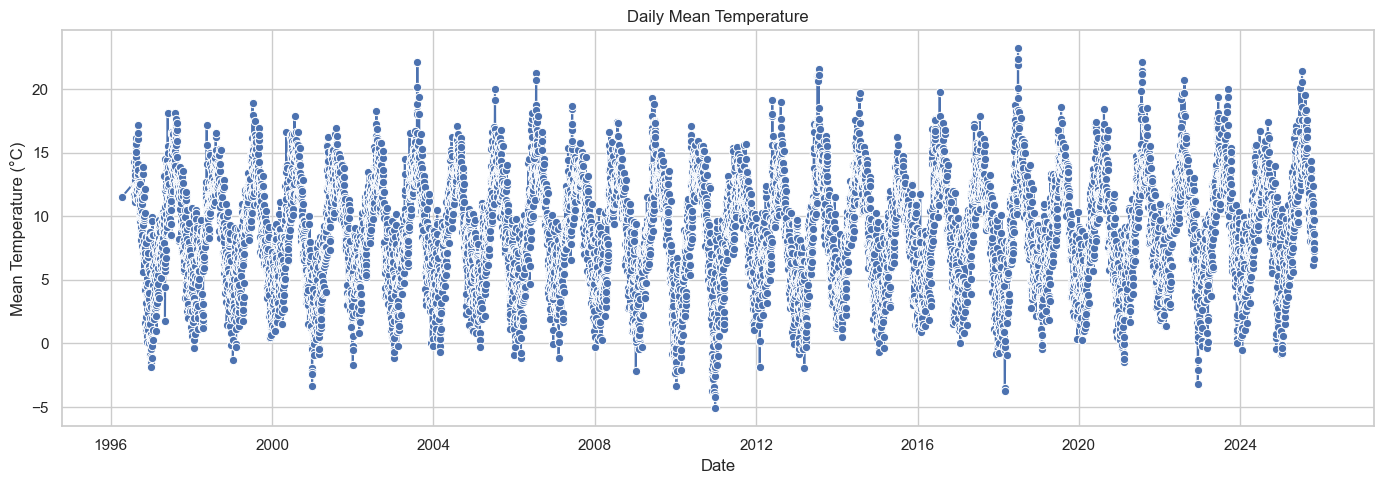

In [ ]:
# Daily mean temperature 
daily_mean = df['temp'].resample('D').mean()
print('\nDaily mean sample:')
print(daily_mean.head())

# Visualise 
plt.figure(figsize=(14,5))
ax = sns.lineplot(x=daily_mean.index, y=daily_mean.values, marker='o')
ax.set_title('Daily Mean Temperature')
ax.set_xlabel('Date')
ax.set_ylabel('Mean Temperature (°C)')
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(mdates.AutoDateLocator()))
plt.tight_layout()
plt.show()


C:\Users\laura\AppData\Local\Temp\ipykernel_9992\3304327317.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_mean = df['temp'].resample('M').mean()



Monthly mean sample:
date
1996-04-30    11.500000
1996-05-31          NaN
1996-06-30          NaN
1996-07-31    12.650000
1996-08-31    12.946909
Freq: ME, Name: temp, dtype: float64


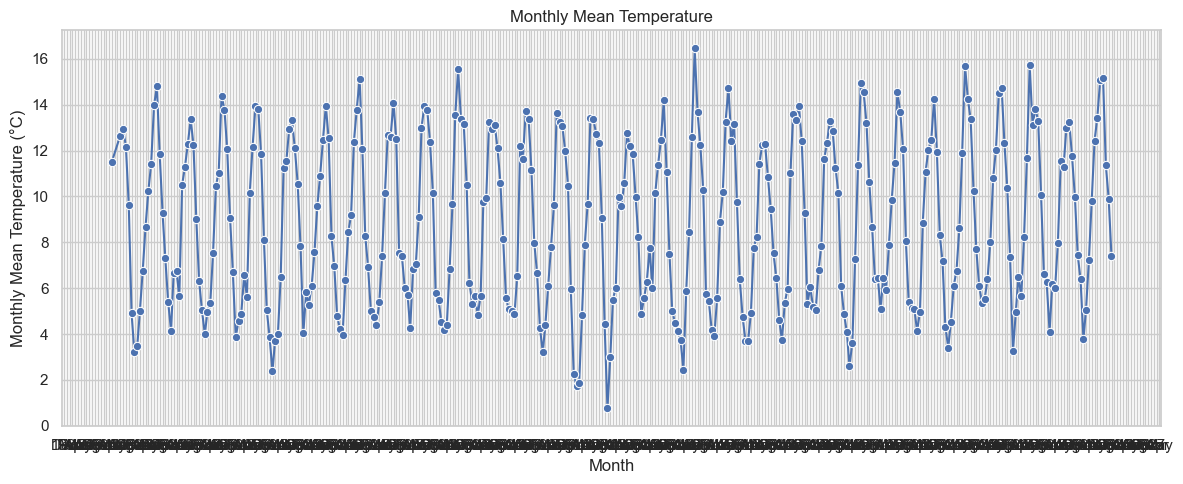

In [ ]:
# Monthly mean temperature
monthly_mean = df['temp'].resample('M').mean()
print('\nMonthly mean sample:')
print(monthly_mean.head())

plt.figure(figsize=(12,5))
ax = sns.lineplot(x=monthly_mean.index, y=monthly_mean.values, marker='o')
ax.set_title('Monthly Mean Temperature')
ax.set_xlabel('Month')
ax.set_ylabel('Monthly Mean Temperature (°C)')
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(mdates.AutoDateLocator()))
plt.tight_layout()
plt.show()

Part 2: Windspeed Section

In [ ]:
# Windspeed section 

# Identify windspeed column
possible_wind_cols = [c for c in df.columns if c.lower() in (
    'wind','windsp','windspeed','windspd','ff','spd','wind_speed','ws','wind speed')]

if not possible_wind_cols:
    # if none found by exact matches, do a fuzzy-ish search
    possible_wind_cols = [c for c in df.columns if 'wind' in c.lower() or 'spd' in c.lower()]

if not possible_wind_cols:
    raise ValueError('No windspeed-like column found. Columns present: ' + ','.join(df.columns))

wcol = possible_wind_cols[0]
print('\nUsing windspeed column:', wcol)

# Convert to numeric (coerce non-numeric to NaN)
df[wcol] = pd.to_numeric(df[wcol], errors='coerce')


ValueError: No windspeed-like column found. Columns present: ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt

In [ ]:

# Plot raw windspeed (hourly)
plt.figure(figsize=(14,5))
ax = sns.lineplot(x=df.index, y=df[wcol])
ax.set_title(f'Hourly {wcol} (raw, missing values visible)')
ax.set_xlabel('Date')
ax.set_ylabel(f'{wcol} (units as in file)')
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(mdates.AutoDateLocator()))
plt.tight_layout()
plt.show()


NameError: name 'wcol' is not defined

<Figure size 1400x500 with 0 Axes>

In [ ]:
#Rolling windspeed (24-hour rolling average)
# If data are hourly, use window=24. If not exactly hourly, this still gives a rolling window of 24 samples.
rolling_window = 24
rolling_wind = df[wcol].rolling(window=rolling_window, min_periods=1).mean()

plt.figure(figsize=(14,5))
ax = sns.lineplot(x=rolling_wind.index, y=rolling_wind.values)
ax.set_title(f'{rolling_window}-Sample Rolling Mean of {wcol}')
ax.set_xlabel('Date')
ax.set_ylabel(f'Rolling mean {wcol}')
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(mdates.AutoDateLocator()))
plt.tight_layout()
plt.show()

NameError: name 'wcol' is not defined

In [ ]:
# Daily max windspeed
daily_max_wind = df[wcol].resample('D').max()
print('\nDaily max wind sample:')
print(daily_max_wind.head())

plt.figure(figsize=(14,5))
ax = sns.lineplot(x=daily_max_wind.index, y=daily_max_wind.values, marker='o')
ax.set_title('Daily Maximum Windspeed')
ax.set_xlabel('Date')
ax.set_ylabel(f'Daily max {wcol}')
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(mdates.AutoDateLocator()))
plt.tight_layout()
plt.show()


NameError: name 'wcol' is not defined

In [ ]:
#  Monthly mean of daily max windspeeds
monthly_mean_daily_max = daily_max_wind.resample('M').mean()
print('\nMonthly mean of daily max windspeeds:')
print(monthly_mean_daily_max.head())

plt.figure(figsize=(12,5))
ax = sns.lineplot(x=monthly_mean_daily_max.index, y=monthly_mean_daily_max.values, marker='o')
ax.set_title('Monthly Mean of Daily Maximum Windspeeds')
ax.set_xlabel('Month')
ax.set_ylabel(f'Monthly mean of daily max {wcol}')
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(mdates.AutoDateLocator()))
plt.tight_layout()
plt.show()


NameError: name 'daily_max_wind' is not defined